# Sentiment Analysis of Twitter Data

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

## Reading Dataset

In [5]:
df_tweet = pd.read_csv(r'C:\Users\Brij\Downloads\archive\training1600000.csv')


In [6]:
df_tweet.head()

,Target,Id,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Ploting Dataset as per Sentiment Value

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Questions')

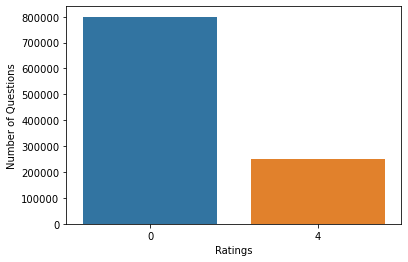

In [7]:
sns.countplot(df_tweet.Target)
plt.xlabel('Ratings')
plt.ylabel('Number of Questions')

In [8]:
df_Neg = df_tweet[df_tweet['Target']==0]
df_Pos = df_tweet[df_tweet['Target']==4]

In [9]:
from PIL import Image

## Ploting Word Cloud of Negative and Positive Tweets

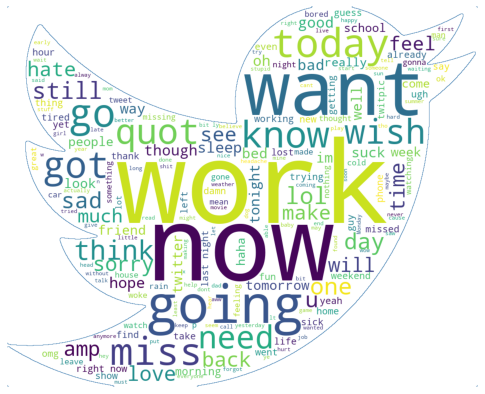

In [10]:
twitter_mask = np.array(Image.open(r"C:\Users\Brij\Desktop\twitter_mask.png"))

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Neg['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Negative-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

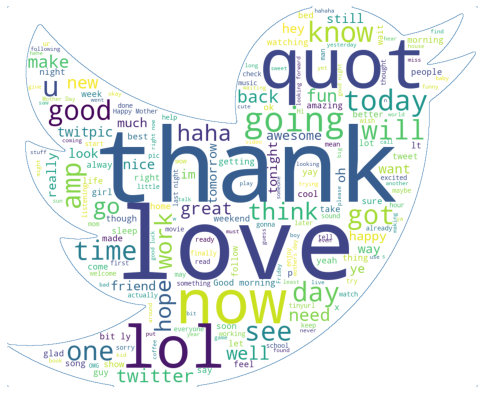

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Pos['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Positive-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

## Adding Sentiment from Target Value

In [12]:
df_tweet['Sentiment'] = df_tweet.Target.replace({
    0:'negative',
    2:'neutral',
    4:'positive'
})

In [13]:
df_tweet.head()

,Target,Id,Date,Flag,User,Text,Sentiment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,negative
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,negative
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,negative
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",negative
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,negative


In [14]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy
from textblob import TextBlob

In [17]:
df_sample = df_tweet.sample(n=50000)
df_X = df_sample['Text']
df_y = df_sample['Sentiment']

## Introduced Subjectivity and Polarity with use of TextBlob

In [18]:
#Subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_sample['Subjectivity']=df_sample['Text'].apply(getSubjectivity)
df_sample['Polarity']=df_sample['Text'].apply(getPolarity)
df_sample

,Target,Id,Date,Flag,User,Text,Sentiment,Subjectivity,Polarity
313160,0,2001691153,Tue Jun 02 01:44:25 PDT 2009,NO_QUERY,spidermonkeyloo,oh dear. apparently i talk to people like i'm ...,negative,0.350000,0.050000
22144,0,1557424541,Sun Apr 19 04:01:55 PDT 2009,NO_QUERY,sjclark9,Finished the last of my 18 extras for this wee...,negative,0.529167,0.000000
131749,0,1835599671,Mon May 18 06:21:09 PDT 2009,NO_QUERY,galleysmith,@toniandrews I'm sorry you are unwell. Do you ...,negative,1.000000,-0.500000
35519,0,1565258093,Mon Apr 20 06:18:52 PDT 2009,NO_QUERY,MegsEggs,@Schofe can i come work at this morning? i'm b...,negative,1.000000,-0.500000
687407,0,2251264444,Sat Jun 20 02:57:21 PDT 2009,NO_QUERY,yulitaputri,i miss him i want to meet him!,negative,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
596883,0,2219129775,Wed Jun 17 23:51:35 PDT 2009,NO_QUERY,shanedawson,i want an iphone but i have sprint,negative,0.000000,0.000000
953928,4,1824749466,Sun May 17 02:45:36 PDT 2009,NO_QUERY,LindaStanford,Remember - your thoughts of today create your ...,positive,0.335227,0.142045
629586,0,2231697680,Thu Jun 18 18:54:33 PDT 2009,NO_QUERY,blueberryshoes,"i want a cappucino skor blizzard. wait, they d...",negative,0.000000,0.000000
11103,0,1551203341,Sat Apr 18 08:25:24 PDT 2009,NO_QUERY,jacquiesce,Suppose to be going out tonight but feel ill s...,negative,0.500000,-0.250000


In [19]:
# #Plotting the polarity and subjectivity
# plt.figure(figsize=(8,6))
# for i in range(0,df_sample.shape[0]):
# plt.scatter(df_sample['Polarity'].iloc[i],df_sample['Subjectivity'].iloc[i],color='Green')

# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [20]:
df_X = df_X.astype(str)

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Overall ratings')

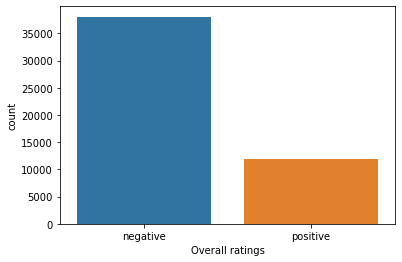

In [21]:
sns.countplot(df_y)
plt.xlabel('Overall ratings')

In [22]:
df_X

313160    oh dear. apparently i talk to people like i'm ...
22144     Finished the last of my 18 extras for this wee...
131749    @toniandrews I'm sorry you are unwell. Do you ...
35519     @Schofe can i come work at this morning? i'm b...
687407                      i miss him  i want to meet him!
                                ...                        
596883                  i want an iphone but i have sprint 
953928    Remember - your thoughts of today create your ...
629586    i want a cappucino skor blizzard. wait, they d...
11103     Suppose to be going out tonight but feel ill s...
81505     @KJLHMixdown did ya'll already air the intervi...
Name: Text, Length: 50000, dtype: object

In [23]:
df_y

313160    negative
22144     negative
131749    negative
35519     negative
687407    negative
            ...   
596883    negative
953928    positive
629586    negative
11103     negative
81505     negative
Name: Sentiment, Length: 50000, dtype: object

In [24]:
df_rev = pd.DataFrame(data=df_X)
df_rev.columns = ['Text']
df_rev.head()

,Text
313160,oh dear. apparently i talk to people like i'm ...
22144,Finished the last of my 18 extras for this wee...
131749,@toniandrews I'm sorry you are unwell. Do you ...
35519,@Schofe can i come work at this morning? i'm b...
687407,i miss him i want to meet him!


## Preprocessing and Cleaning of data 

In [27]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    columntext = doc["Text"] 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', columntext)
    
    tokens = cleantext.split()
    
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [28]:
df_sample['Body_token'] =  df_sample.apply(clean_doc, axis=1)

In [29]:
def listToString(s): 
    
    columntext = s["Body_token"]
    # initialize an empty string
    str1 = ' '.join([str(elem) for elem in columntext])
    # return string  
    return str1

In [30]:
df_sample['Body_token_string'] =  df_sample.apply(listToString, axis=1)

## Feature Extraction with the help of CountVectorizer and Tfidf

In [31]:
def final(X_data_full):
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full.iloc[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [32]:
df_new = df_sample['Body_token_string']
df_new= df_new.astype(str)

## Training and Testing Split

In [33]:
data_X = final(df_new)
X_train, X_test, y_train, y_test = train_test_split(data_X, df_y, test_size=0.25, random_state= 3000)

## Multinomial Naive Byes 

In [34]:
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)
predictions = multinomialNB.predict(X_test)

In [35]:
# Model evaluation
#Finding the f1 score and accuracy for the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

multinomialNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
multinomialNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , multinomialNB_accuracy , " %")
print("f1_score : " , multinomialNB_f1)

              precision    recall  f1-score   support

    negative       0.80      0.99      0.88      9510
    positive       0.83      0.19      0.31      2990

    accuracy                           0.80     12500
   macro avg       0.81      0.59      0.60     12500
weighted avg       0.80      0.80      0.74     12500

[[9394  116]
 [2418  572]]
Accuracy :  79.73  %
f1_score :  0.745


## Decision Trees

In [36]:
# Decision Trees
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dct_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dct_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , dct_accuracy , " %")
print("f1_score : " , dct_f1)

[[8076 1434]
 [1766 1224]]
              precision    recall  f1-score   support

    negative       0.82      0.85      0.83      9510
    positive       0.46      0.41      0.43      2990

    accuracy                           0.74     12500
   macro avg       0.64      0.63      0.63     12500
weighted avg       0.73      0.74      0.74     12500

Accuracy :  74.4  %
f1_score :  0.739


## Logistic Regression

In [38]:
model = LogisticRegression(C=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
log_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
log_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , log_accuracy , " %")
print("f1_score : " , log_f1)

[[9087  423]
 [1921 1069]]
              precision    recall  f1-score   support

    negative       0.83      0.96      0.89      9510
    positive       0.72      0.36      0.48      2990

    accuracy                           0.81     12500
   macro avg       0.77      0.66      0.68     12500
weighted avg       0.80      0.81      0.79     12500

Accuracy :  81.25  %
f1_score :  0.788


## Random Forest Classifier 

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= 3000)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [41]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      9510
    positive       0.60      0.32      0.42      2990

    accuracy                           0.79     12500
   macro avg       0.71      0.63      0.64     12500
weighted avg       0.76      0.79      0.76     12500

[[8867  643]
 [2031  959]]
Accuracy :  78.61  %
f1_score :  0.761


## Overall Accuracy Report of all Model

In [44]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontweight='bold',fontdict=dict(fontsize=15))

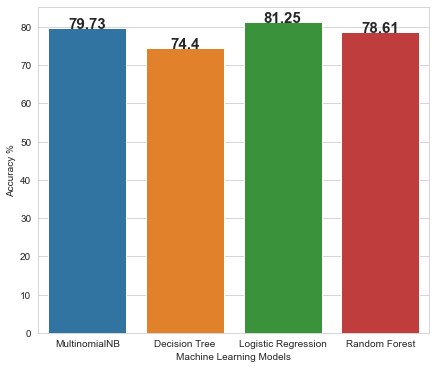

<Figure size 432x288 with 0 Axes>

In [49]:
model = ['MultinomialNB',  'Decision Tree', 'Logistic Regression', 'Random Forest']
acc = [multinomialNB_accuracy, dct_accuracy, log_accuracy, rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(7,6))
plt.yticks(np.arange(0,100,10))
addlabels(model, acc)
plt.ylabel("Accuracy %")
plt.xlabel("Machine Learning Models")
sns.barplot(x= model, y= acc)
fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('Final-Result-1', dpi=100)